In [1]:
import pandas as pd
import numpy as np
from hmmlearn.hmm import GaussianHMM

# matplotlib for plotting
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize
import matplotlib
from datetime import datetime

In [2]:
df = pd.read_excel('data.xlsx')

In [3]:
# applying filter function  
df = df.loc[df['PR_Anlage_ID'] == 1].filter(["Datum/Uhrzeit", "Freie Parkplaetze"]) 

In [4]:
df['Datum/Uhrzeit'] = pd.to_datetime(df['Datum/Uhrzeit']).dt.strftime('%Y-%m-%d')


In [5]:
cur = []
data = []
last = 'bahar'
for index, row in df.iterrows():
    if index != 0 and row[0] != last:
        data.append(cur)
        cur = []
        
    cur.append([row[1]])
    last = row[0]
data.append(cur)
cur = []

In [6]:
lengths = [len(i) for i in data]

In [7]:
X = np.concatenate([i for i in data])

In [8]:
n_components = 8
model = GaussianHMM(n_components=n_components, algorithm='viterbi', covariance_type='full', n_iter=288)


In [9]:
model.fit(X, lengths)

GaussianHMM(algorithm='viterbi', covariance_type='full', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=8, n_iter=288, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

In [10]:
hidden_states = model.predict(X)

In [11]:
predicate_array, cov = model.sample(288)

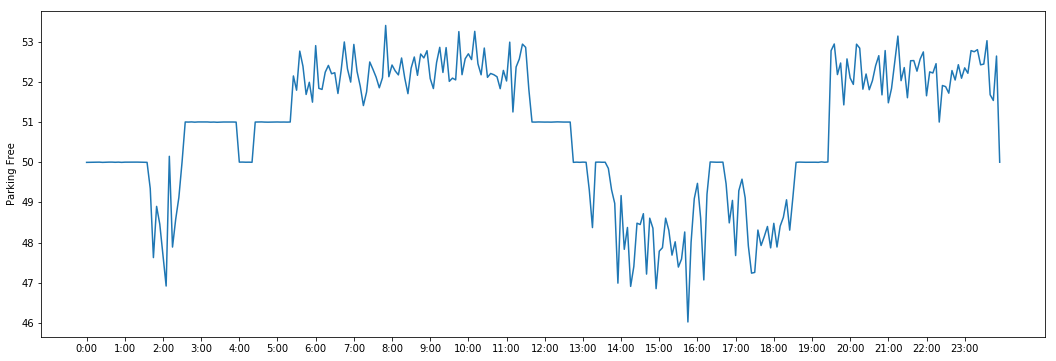

In [32]:
%matplotlib inline

x_labels = ['{}:00'.format(i) for i in range(24)]
x_trcikes = [y * (len(predicate_array) // len(x_labels)) for y in range(len(x_labels))]
figsize(18, 6)

plt.plot(predicate_array)
plt.ylabel('Parking Free')
plt.xticks(x_trcikes, x_labels);
plt.show()